# Lab 3

*Name:* **Sajan Sahikarmi**<br>
*Roll No:*` KCE080BCT035`<br>
*Date:* **27/05/2025** 
## Objectives:

- Understand solution of system of  linear Equations 
- Implement solution of system of  linear equations with Python and implement matrix operations in python 



## 1. Gauss Jordan Method;

Solution: [-1.  1.  5.]


<function matplotlib.pyplot.show(close=None, block=None)>

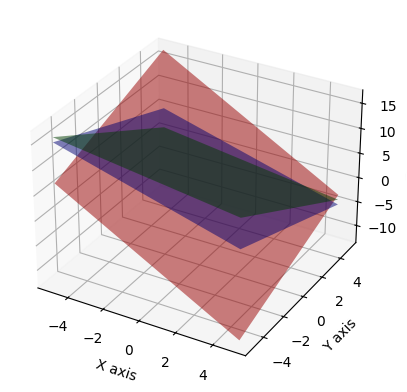

In [1]:
import numpy as np 
def gauss_jordan(A, b):
    n = len(b)
    AugmentedMatrix = np.hstack([A, b.reshape(-1, 1)])  # Create augmented matrix [A|b]

    # Perform Gauss-Jordan elimination
    for i in range(n):
        AugmentedMatrix[i] = AugmentedMatrix[i] / AugmentedMatrix[i, i]  # Scale pivot to 1
        for j in range(n):
            if i != j:
                AugmentedMatrix[j] = AugmentedMatrix[j] - AugmentedMatrix[j, i] * AugmentedMatrix[i]

    # Return the solution vector
    return AugmentedMatrix[:, -1]

# Example Usage
A = np.array([[2, -1, 1], [1, 3, 2], [1, 1, 1]], dtype=float)
b = np.array([2, 12, 5], dtype=float)
solution = gauss_jordan(A, b)
print("Solution:", solution)

# Output: Solution: [-1.  1.  5.]

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the plane equations based on the system
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)
Z1 = (2 - 2*X + Y) / 1
Z2 = (12 - X - 3*Y) / 2
Z3 = 5 - X - Y

# Plot the planes
ax.plot_surface(X, Y, Z1, alpha=0.5, rstride=100, cstride=100, color='r')
ax.plot_surface(X, Y, Z2, alpha=0.5, rstride=100, cstride=100, color='g')
ax.plot_surface(X, Y, Z3, alpha=0.5, rstride=100, cstride=100, color='b')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show
